In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#getting and sorting data
data = np.loadtxt("/content/IC79-2010-events.txt", skiprows=1)
data = data[data[:,1].argsort()]  #Selects column number
data = data.transpose() #flipping array

In [4]:
def null_values(x, y, unitperbin):
    np.random.seed(x)
    randomra = 360 * np.random.random_sample((1, 93133))

    xedges = np.linspace(0, 360, num=(int(360/unitperbin)))
    yedges = np.linspace(-90, 90, num=(int(180/unitperbin)))

    x = randomra[0]
    y = y

    H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
    return H

def average_nullvalues(x, y, unitperbin):
    a = null_values(0, y, unitperbin)
    c = np.arange(1, x)
    for item in c:
        b = null_values(item, y, unitperbin)
        a = np.add(a, b)
    average = a / x
    return average

def null_chi_squared_withseed(x, y, z, unitperbin):
    a = null_values(x, y, unitperbin)
    b = z
    values = np.subtract(a, b)
    values = np.square(values)
    values = np.sum(values)
    return values

def null_chi_squared_distrib(seedstart, seedend, dec, avgbckd, unitperbin):
    c = np.array([])
    a = np.arange(seedstart, seedend)
    for item in a:
        b = null_chi_squared_withseed(item, dec, avgbckd, unitperbin)
        c = np.append(c, b)
    return c

#adds counts to a random backgroud array
def add_points_beta(rangestart, rangeend, num_counts, total_counts, thing1, raordec):
    l = np.array([np.linspace(rangestart, rangeend, num=num_counts)])
    random_array = thing1
    random_array = np.append(random_array, l[0])
    return random_array

def add_clusters_beta(num_clusters, num_counts, range_size, sample_max, sample_min, raordec, x):
    if raordec == True:
        a = 360 * np.random.random_sample((1, 93133-((num_counts)*(num_clusters))))
        array_like1 = a[0]
    else:
        a = x
        array_like1 = np.delete(a, np.s_[0:(num_clusters*num_counts)])
    numtimes = (sample_max - sample_min) * np.random.random_sample((1, num_clusters)) + sample_min
    for item in numtimes[0]:
        array_like1 = add_points_beta((item - range_size), item, num_counts, (num_counts)*(num_clusters), array_like1, raordec)
    return array_like1

#arrays cannot have same seed
def alt_values_beta(num_clusters, num_counts, range_size, seed, array, unitperbin):
    np.random.seed(seed)
    xedges = np.linspace(0, 360, num=(int(360/unitperbin)))
    yedges = np.linspace(-90, 90, num=(int(180/unitperbin)))

    x = add_clusters_beta(num_clusters, num_counts, range_size, 360, 0, True, array)
    y = add_clusters_beta(num_clusters, num_counts, range_size, 90, -90, False, array)

    H, ___, ___= np.histogram2d(x, y, bins=(xedges, yedges))
    return H.flatten()

def alt_chi_squared_withseed(num_clusters, num_counts, range_size, x, seed, array, unitperbin):
    a = x
    b = alt_values_beta(num_clusters, num_counts, range_size, seed, array, unitperbin)
    values = np.subtract(b, a)
    values = np.square(values)
    values = np.sum(values)
    return values

def alt_chi_squared_distrib(y, num_clusters, num_counts, range_size, x, array, unitperbin):
    c = np.array([])
    a = np.arange(y)
    for item in a:
        b = alt_chi_squared_withseed(num_clusters, num_counts, range_size, x, item, array, unitperbin)
        c = np.append(c, b)
    return c

def get_thresh(p, arr):
    #my version of a p-value to TS conversion
    arr = np.sort(arr)[::-1]
    topentries = int(p*len(arr))
    return min(arr[0:topentries])

def real_chi_squared(ra, dec, avg_bckd, unitperbin):
    xedges = np.linspace(0, 360, num=(int(360/unitperbin)))
    yedges = np.linspace(-90, 90, num=(int(180/unitperbin)))

    x = ra
    y = dec

    H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
    a = H.flatten()
    b = avg_bckd
    values = np.subtract(a, b)
    values = np.square(values)
    values = np.sum(values)
    return values

def p_value(chi_squared, null_distrib, num_seeds):
    a = 0
    for item in null_distrib:
        if item > chi_squared:
            a = a+1
        else:
            a = a
    p = a/(num_seeds)
    return p

In [ ]:
uf_avg_bckgd5 = average_nullvalues(1000, data[4], 0.5)
avg_bckgd5 = uf_avg_bckgd5.flatten()
#uf_avg_bckgd1 = average_nullvalues(100, data[4], 1)
#avg_bckgd1 = uf_avg_bckgd1.flatten()
#uf_avg_bckgd3 = average_nullvalues(100, data[4], 0.3)
#avg_bckgd3 = uf_avg_bckgd3.flatten()
#uf_avg_bckgd7 = average_nullvalues(100, data[4], 0.7)
#avg_bckgd7 = uf_avg_bckgd7.flatten()
#uf_avg_bckgd01 = average_nullvalues(100, data[4], 0.1)
#avg_bckgd01 = uf_avg_bckgd01.flatten()

#Store these results in a dictionary for later
#avg_bgs = {0.1:avg_bckgd01, 1:avg_bckgd1, 0.5:avg_bckgd5, 0.7:avg_bckgd7, 0.3:avg_bckgd3}

93582.73567400001


Text(0, 0.5, 'N')

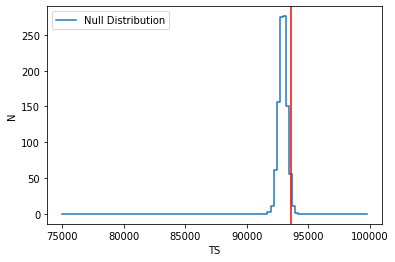

In [ ]:
null_chi5 = null_chi_squared_distrib(0, 1000, data[4], avg_bckgd5, 0.5)
nullhist, nullbins = np.histogram(null_chi1, bins = np.linspace(75000,100000,100))
nullbins = nullbins[:-1]
plt.plot(nullbins, nullhist, drawstyle='steps-post', label='Null Distribution')

chi_5 = real_chi_squared(data[3], data[4], avg_bckgd5, 0.5)
print(chi_5)
plt.axvline(chi_5, color='red')
#alt_chi1 = alt_chi_squared_distrib(100, 1, 1, 1, avg_bckgd1, data[4], 1)
#althist, altbins = np.histogram(alt_chi1, bins = np.linspace(75000,180000,100))
#altbins = altbins[:-1]
#plt.plot(altbins, althist, drawstyle='steps-post', label='Signal Distrubition')
#plt.hist(null_chi1, bins=np.linspace(75000,180000,50), label='1 unit/bin')
#plt.hist(alt_chi1, bins=np.linspace(75000,180000,50), label='1 unit/bin')
plt.legend()
plt.xlabel('TS')
plt.ylabel('N')

In [ ]:
p_value(chi_5, null_chi5, 1000)

0.031

Text(0, 0.5, 'Fraction of Trials with TS>Threshold')

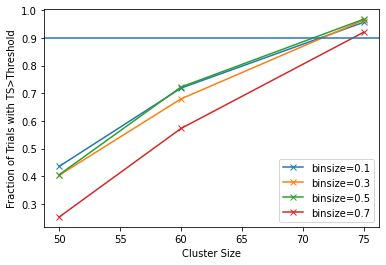

In [ ]:
for binsize in [0.1,0.3,0.5,0.7]:
    nulldist =  alt_chi_squared_distrib(100,1, 1, 1, avg_bgs[binsize], data[4], binsize)
    #Set my p-value threshold to be 0.1
    thresh = get_thresh(0.01, nulldist)

    nsizes = [50,60,75]
    effs = []
    for nsize in nsizes:
        alt_chi1 = alt_chi_squared_distrib(1000,1, nsize, 1, avg_bgs[binsize], data[4], binsize)
        alt_chi1 = np.array(alt_chi1)
        eff = float(len(alt_chi1[alt_chi1>thresh]))/float(len(alt_chi1))
        effs.append(eff)
    plt.plot(nsizes, effs, 'x-', label='binsize=%s'%(binsize))
    
plt.legend(loc=0)
plt.axhline(0.9)
plt.xlabel('Cluster Size')
plt.ylabel('Fraction of Trials with TS>Threshold')

In [ ]:
uf_avg_bckgd4 = average_nullvalues(1000, data[4], 0.1)

In [ ]:
len(uf_avg_bckgd4)


359

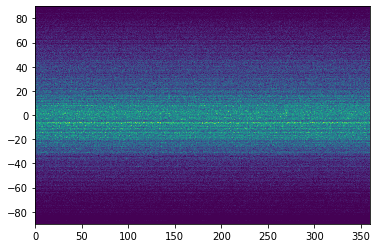

In [ ]:
H, bins = np.histogram
xedges = np.linspace(0, 360, num=3600)
yedges = np.linspace(-90, 90, num=1800)
fig, ax = plt.subplots()
X, Y = np.meshgrid(xedges, yedges)
ax.pcolormesh(X, Y, H.T)

In [ ]:
help(pcolormesh)

NameError: name 'pcolormesh' is not defined

100
100


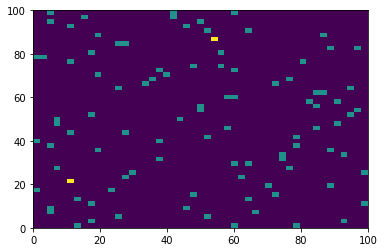

In [ ]:
x = np.linspace(0, 100, num=100)
y = 100 * np.random.random_sample((1, 100))
xedges = np.linspace(0,100)
yedges = np.linspace(0,100)

H, xedges, yedges = np.histogram2d(x, y[0], bins=(xedges, yedges))
fig, ax = plt.subplots()
X, Y = np.meshgrid(xedges, yedges)
ax.pcolormesh(X, Y, H)

In [ ]:
x = np.linspace(0, 100, num=100)
y = 100 * np.random.random_sample((1, 100))
xedges = np.linspace(0,100)
yedges = np.linspace(0,100)

H, xedges, yedges = np.histogram2d(x, y[0], bins=(xedges, yedges))
xedges

array([  0.        ,   2.04081633,   4.08163265,   6.12244898,
         8.16326531,  10.20408163,  12.24489796,  14.28571429,
        16.32653061,  18.36734694,  20.40816327,  22.44897959,
        24.48979592,  26.53061224,  28.57142857,  30.6122449 ,
        32.65306122,  34.69387755,  36.73469388,  38.7755102 ,
        40.81632653,  42.85714286,  44.89795918,  46.93877551,
        48.97959184,  51.02040816,  53.06122449,  55.10204082,
        57.14285714,  59.18367347,  61.2244898 ,  63.26530612,
        65.30612245,  67.34693878,  69.3877551 ,  71.42857143,
        73.46938776,  75.51020408,  77.55102041,  79.59183673,
        81.63265306,  83.67346939,  85.71428571,  87.75510204,
        89.79591837,  91.83673469,  93.87755102,  95.91836735,
        97.95918367, 100.        ])

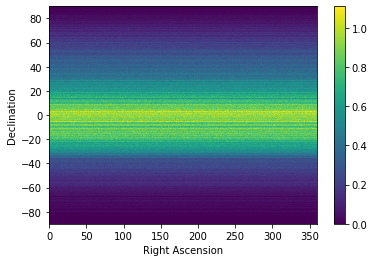

In [7]:
H = average_nullvalues(1000, data[4], 0.5)
xedges = np.linspace(0, 360, num=720)
yedges = np.linspace(-90, 90, num=360)
fig, ax = plt.subplots()
X, Y = np.meshgrid(xedges, yedges)
c = ax.pcolormesh(X, Y, H.T)
plt.colorbar(c)
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.show()

In [1]:
#This is an example change!